In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Frist let's load the cleaned up dataset
url = "https://raw.githubusercontent.com/sanjanabansal1994/Early-Stage-Diabetes-Risk-Prediction/mehrdadmalekmo/modeling/data/processed.csv"
dataset = pd.read_csv(url)
dataset.head()

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group__34,age_group_35_49,age_group_50_64,age_group_65_
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0


In [3]:
# Define X (features) and Y (target)
X = dataset.drop('class', axis=1)
y = dataset['class']

In [4]:
# Split the data into training and tesing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=63)

In [7]:
# Create a neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7378 - loss: 0.6445
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5558 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7838 - loss: 0.4867 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8999 - loss: 0.3691 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9113 - loss: 0.3172 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9270 - loss: 0.2909 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9396 - loss: 0.2581 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9423 - loss: 0.2106 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9599 - loss: 0.1783 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.1612 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9543 - loss: 0.1881  
Accuracy: 0.932692289352417


In [26]:
import shap
import numpy as np

explainer = shap.KernelExplainer(model.predict, X_train)

# Calculate SHAP values for a subset
shap_values = explainer.shap_values(X_test[:20])


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
27118/27118 ━━━━━━━━━━━━━━━━━━━━ 36s 1

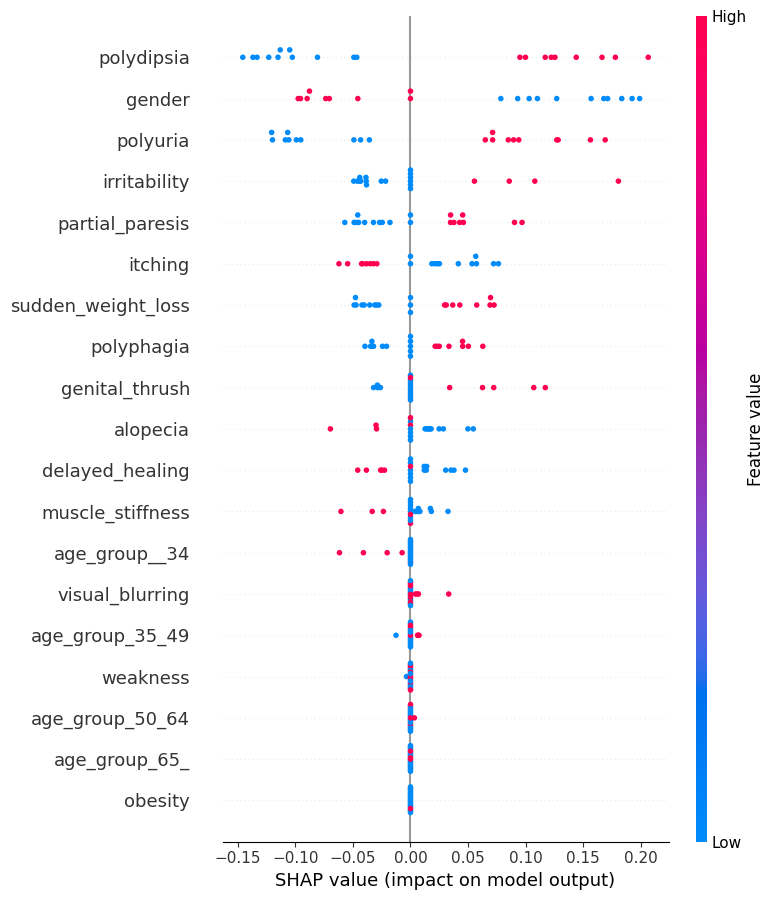

In [27]:
shap.summary_plot(shap_values[:,:,0], X_test[:20])
